created by Zsolt Elter (2020)

# 1st tutorial


## 1st exercise: enrichment

$$ \epsilon = \frac{N_{235}}{N_{235}+N_{238}} $$

let's rearrange this

$$ \frac{1}{\epsilon} = \frac{N_{235}+N_{238}}{N_{235}} = 1 + \frac{N_{238}}{N_{235}} $$

The same is true to some t=0 (this might be at the birth of the Earth, or any other arbitrary choice). so Let's say

$$ \frac{1}{\epsilon_0} = \frac{N_{235,0}+N_{238,0}}{N_{235,0}} = 1 + \frac{N_{238,0}}{N_{235,0}} $$


Now consider it a certain time $t$ after

$$ \epsilon (t) = \frac{N_{235,0}e^{-\lambda_{235}t}}{N_{235,0}e^{-\lambda_{235}t}+N_{238,0}e^{-\lambda_{238}t}} = \frac{N_{235,0}C_{235}(t)}{N_{235,0}C_{235}(t)+N_{238,0}C_{238}(t)}$$

if t=0 is at the birth of Earth (so now is 4.5e9 years after)

$$ \epsilon_{now} = \frac{N_{235,0}C_{235}}{N_{235,0}C_{235}+N_{238,0}C_{238}}$$

thus

$$ \frac{1}{\epsilon_{now}} = 1+ \frac{N_{238,0}}{N_{235,0}}\frac{C_{238}}{C_{235}}$$

so


$$ \frac{N_{238,0}}{N_{235,0}} = (\frac{1}{\epsilon_{now}}-1)\frac{C_{235}}{C_{238}}$$

finally

$$\epsilon_0 = \frac{1}{1+ (\frac{1}{\epsilon_{now}}-1)\frac{C_{235}}{C_{238}}}$$

where $\epsilon_{now}=0.0072$





In [60]:
import numpy as np
import matplotlib.pyplot as plt
epsNow=0.72/100
t=4.5e9 #y
l5=np.log(2)/7.13e8 #1/y
l8=np.log(2)/4.468e9 #1/y

C235=np.exp(-l5*t)
C238=np.exp(-l8*t)

eps0=1/(1+(1/epsNow-1)*C235/C238)
print(eps0)

0.22272471435556812


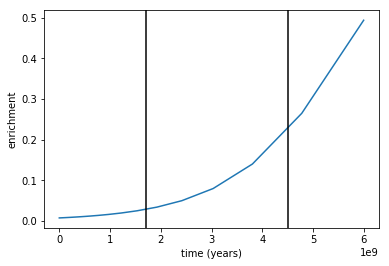

In [61]:
t=np.logspace(9.778,0,100)
C235=np.exp(-l5*t)
C238=np.exp(-l8*t)
eps0=1/(1+(1/epsNow-1)*C235/C238)

plt.figure()
plt.plot(t,eps0)
plt.axvline(x=4.5e9,color='k') #Birth
plt.axvline(x=1.7e9,color='k') #Oklo
plt.xlabel('time (years)')
plt.ylabel('enrichment')
plt.show()

## 2nd exersize: Xenon

Xe-135 has a huge neutron capture cross section (depending on reactor conditions it is 2-3 million barns). It is produced from fission and also from the decay of I-135.

a, What is the saturation concentration of Xe and I? How does it depend on the flux?
b, How does the amount of Xe-135 change after the shutdown of the reactor?



Simplified path for Xe135: it is produced from fission, decays with T1/2=9.17h and consumed by absorption. Also I135 is created in fission, and decays into Xe135.

Then the system can be expressed with the coupled ODE:


$$ \frac{dN_I}{dt}=Y_I \Sigma_f\varphi-\lambda_I N_I $$

and

$$ \frac{dN_{Xe}}{dt}=Y_{Xe}\Sigma_f\varphi + \lambda_IN_I -\lambda_{Xe}N_{Xe} - \sigma_{Xe}N_{Xe}\varphi  $$

with conditions $N_I(0)=N_{Xe}(0)=0$

Solving the first one is rather simple:

$$ N_I(t)=\frac{Y_I\Sigma_f\varphi}{\lambda_I} - \frac{Y_I\Sigma_f\varphi}{\lambda_I}e^{-\lambda_It} $$

with that the Xe differential equation becomes

$$ \frac{dN_{Xe}}{dt}=Y_{Xe}\Sigma_f\varphi + Y_I\Sigma_f\varphi - Y_I\Sigma_f\varphi e^{-\lambda_It} -\lambda_{Xe}N_{Xe} - \sigma_{Xe}N_{Xe}\varphi  $$

which is still doable by smart people, less smart ones use some tool (eg. with  https://www.wolframalpha.com/input/?i=dN%2Fdt%3DC1%2BC2-C2*exp%28-l1*t%29-l2*N-C3*N )

and the solution becomes

$$ N_{Xe}(t) = c e^{t(-\sigma_{Xe}\varphi - \lambda_{Xe})} + \frac{Y_{Xe}\Sigma_f\varphi}{\sigma_{Xe}\varphi + \lambda_{Xe}} - \frac{Y_I\Sigma_f\varphi}{\sigma_{Xe}\varphi-\lambda_I + \lambda_{Xe}}e^{-\lambda_It} + \frac{Y_{I}\Sigma_f\varphi}{\sigma_{Xe}\varphi + \lambda_{Xe}}  $$

where 

$$ c= \frac{Y_I\Sigma_f\varphi}{\sigma_{Xe}\varphi-\lambda_I + \lambda_{Xe}}  -\frac{(Y_{I}+Y_{Xe})\Sigma_f\varphi}{\sigma_{Xe}\varphi + \lambda_{Xe}}   $$

### Saturation

What is interesting here is the saturation concentration, when $dN/dt = 0$

$$N_I(\infty) = \frac{Y_I\Sigma_f\varphi}{\lambda_I} $$

and 

$$N_{Xe}(\infty) = \frac{(Y_{Xe}+Y_I)\Sigma_f\varphi}{\lambda_{Xe} + \sigma_{Xe}\varphi} $$

Now, $\lambda_{Xe}$ is around 1e-5, similar order of magnitude as $\sigma_{Xe}\varphi$ if the flux is around 1e13 (as in a normal reactor).  So notice, for low ($\leq$ 1e12) fluxes,  then $\sigma_{Xe}\varphi$ can be neglected, and the concentration is proportional to the flux! If the flux is high ($\geq$ 1e14), the $\lambda_{Xe}$ can be neglected, and the concentration is independent from the flux. In reality the flux is usally somewhere in between, the concentration is not proportional anymore with the flux, but still grows with it.


In [82]:
Y_Xe=7.507970e-04
Y_I=2.922920e-02+3.211290e-02 #for I-135 and Te135
Sigma_f=8.19863245263419E-04*583 #barn-1cm-1 * barn
phi=1e14
T_12_Xe=9.17*60*60 #s
T_12_I=6.58*60*60 #s
lambda_Xe=np.log(2)/T_12_Xe
lambda_I=np.log(2)/T_12_I
sigma_Xe=2e6*1e-24 #barn to cm2

#some helper variables
C_I=Y_I*Sigma_f*phi
C_Xe=Y_Xe*Sigma_f*phi
R_Xe=sigma_Xe*phi
c=C_I/(R_Xe-lambda_I+lambda_Xe)-(C_I+C_Xe)/(R_Xe+lambda_Xe)

t=np.linspace(0,50)*60*60
N_I=C_I/lambda_I - (C_I/lambda_I)*np.exp(-lambda_I*t)
N_Xe=c*np.exp(t*(-R_Xe-lambda_Xe)) + C_Xe/(R_Xe+lambda_Xe) - (C_I/(R_Xe-lambda_I+lambda_Xe))*np.exp(-lambda_I*t) + C_I/(R_Xe+lambda_Xe) 

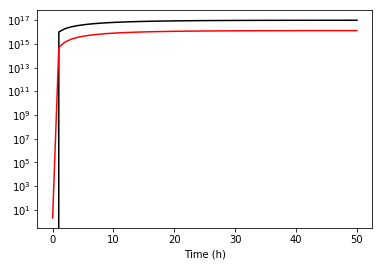

In [83]:
plt.figure()
plt.semilogy(t/60/60,N_I,'k')
plt.semilogy(t/60/60,N_Xe,'r')
plt.xlabel('Time (h)')
plt.show()

### After shutdown

Let's consider that at t=0 zero, Xe and I are already saturated, and the reactor shuts down. The ODEs simplify to (note, flux is zero)

$$ \frac{dN_I}{dt}=-\lambda_IN_I $$

and

$$ \frac{dN_{Xe}}{dt}= \lambda_IN_I -\lambda_{Xe}N_{Xe} $$

with conditions $N_I(0)=N_I(\infty)$ $N_{Xe}(0)=N_{Xe}(\infty)$

which is hopefully not confusing, the infinite case refers to the previously obtained values.

Then

$$ N_I(t)=N_I(\infty)e^{-\lambda_It} $$

and

$$ N_{Xe}(t) = c e^{-\lambda_{Xe}t} - \frac{\lambda_I}{\lambda_I - \lambda_{Xe}}N_I(\infty)e^{-\lambda_{I}t} $$

where

$$ c = N_{Xe}(\infty)+\frac{\lambda_I}{\lambda_I - \lambda_{Xe}}N_I(\infty) $$

thus

$$ N_{Xe} (t) = N_{Xe}(\infty)e^{-\lambda_{Xe}t}+\frac{\lambda_I}{\lambda_I - \lambda_{Xe}}N_I(\infty)e^{-\lambda_{Xe}t} - \frac{\lambda_I}{\lambda_I - \lambda_{Xe}}N_I(\infty)e^{-\lambda_{I}t} $$

$$ N_{Xe} (t) = N_{Xe}(\infty)e^{-\lambda_{Xe}t}+\frac{\lambda_I}{\lambda_I - \lambda_{Xe}}N_I(\infty)(e^{-\lambda_{Xe}t} - e^{-\lambda_{I}t}) $$

In [84]:
N_I_inf=C_I/lambda_I
N_Xe_inf=(C_I+C_Xe)/(R_Xe+lambda_Xe)

N_Xe_shut = N_Xe_inf*np.exp(-lambda_Xe*t)+((lambda_I*N_I_inf)/(lambda_I-lambda_Xe))*(np.exp(-lambda_Xe*t)-np.exp(-lambda_I*t))

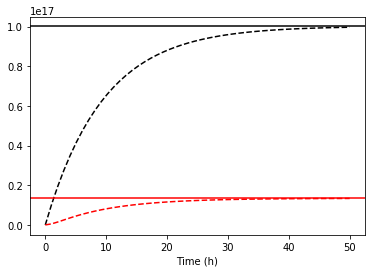

In [85]:
plt.figure()
plt.plot(t/60/60,N_I,'k--')
plt.plot(t/60/60,N_Xe,'r--')
plt.axhline(y=N_Xe_inf,color='r') 
plt.axhline(y=N_I_inf,color='k') 
plt.xlabel('Time (h)')
plt.show()

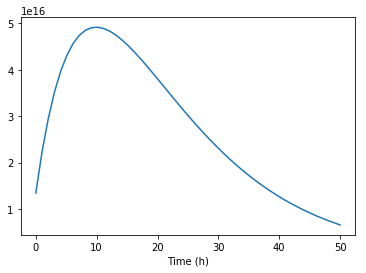

In [86]:
plt.figure()
plt.plot(t/60/60,N_Xe_shut)
plt.xlabel('Time (h)')
plt.show()

## 3rd exercise: neutron flux

A beam of low energy neutrons, with an intensity of 10$^6$ s$^{-1}$ traverses a foil of $^{235}$U, with a thickness of 7.85 $\cdot$ 10$^{-5}$ m. If the fission cross section is 200 barn.

- find the rate of fissions induced in the foil by the neutrons.

$$ I(x)=I_0 e^{-\sigma_fNx} $$

where

$$ N = \frac{N_A \rho}{A} $$

Calculate N, then I(d), finally the fission rate is $I_0 - I(d)$

In [87]:
I0=1e6 #s-1
d=7.85e-3 #cm
sig_f=200*1e-24 #barn to cm2

NA=6.022e23
rho=19.1 #g/cm3
A=235

N=NA*rho/A #/cm3

I=I0*np.exp(-sig_f*N*d) #/s
print('Intensity after the foil (1/s)')
print(I)

print('Fission rate I0-I (1/s)')
print(I0-I)

Intensity after the foil (1/s)
926034.9680710656
Fission rate I0-I (1/s)
73965.03192893439


## 4th exercise: reproduction factor

In a fast reactor we consider the neutron energy to be 100 keV

a, MFP till absorbtion? Survival time?
b, reproduction factor?


XS at 100 keV

$\sigma_{f,235}=1.62569$ barns

$\sigma_{c,235}=0.418086$ barns

$\sigma_{f,238}=5.6687E-5$ barns

$\sigma_{c,238}=0.17841$ barns

the absorbtion cross section is a sum of the to

$$\sigma_{a,i}=\sigma_{f,i}+\sigma_{c,i} $$

The macroscopic cross section is

$$\Sigma_a = \sum_i N_i \sigma_{a,i}$$

where

$$N_i=\frac{\epsilon_i\rho N_A}{M_{mix}}$$

thus

$$\Sigma_a(U) = \frac{\rho_U \cdot N_A}{\epsilon \cdot 235 + (1-\epsilon) \cdot 238} [\epsilon \cdot \sigma_a (^{235}U) + (1-\epsilon) \cdot \sigma_a (^{238}U)] = 0.0157 cm^{-1}$$

and the neutron speed is

$$ v = \sqrt[]{\frac{2E_k}{m}} = 4.37 \cdot 10^6 m/s $$

and then 

$$\ell=\frac{\frac{1}{\Sigma_a}}{v}=0.14 \mu s$$

Finally the reproduction factor is

$$\eta=\frac{\nu\Sigma_f}{\Sigma_a}=0.95 $$

In [59]:
sig_f_235=1.62569*1e-24
sig_c_235=0.418086*1e-24
sig_f_238=5.6687e-5*1e-24
sig_c_238=0.17841*1e-24

rho=19.1 #g/cm3
eps=7.84/100
NA=6.022e23

M_mix=eps*235+(1-eps)*238

sig_a_235=sig_f_235+sig_c_235
sig_a_238=sig_f_238+sig_c_238


N_235=NA*rho*eps/M_mix #/cm3
N_238=NA*rho*(1-eps)/M_mix #/cm3

Sig_a = N_235*sig_a_235 + N_238*sig_a_238
Sig_f = N_235*sig_f_235 + N_238*sig_f_238

print('Macroscopic XS')
print(Sig_a)

mfp=1/Sig_a
print('mfp (cm)')
print(mfp)

eV_to_J=1.60217662e-19
E=100e3*eV_to_J #ev to J
m=1.675E-27 #kg
v=np.sqrt(2*E/m) #m/s
print('speed (m/s)')
print(v)
lifeTime=((1/Sig_a)/100)/v   #change from cm to m
print('life time (us)')
print(lifeTime*1e6)

nubar=2.43
print('--- reproduction factor ---')
eta=nubar*Sig_f/Sig_a

print(eta)


Macroscopic XS
0.015707899929315955
mfp (cm)
63.66223393960391
speed (m/s)
4373838.943591501
life time (us)
0.1455523048759742
--- reproduction factor ---
0.9542155331391308


## 5th exercise: Nuclear Fission

Assume that in each fission of $^{235}$U, 200 MeV is released. Assuming that 5 \% of the energy is wasted in neutrinos,

a, calculate the amount of $^{235}$U burned which would be necessary to supply at 30 \% efficiency an annual electricity consumption of 50 $\times$ 10$^9$ kWh.

$$\frac{E_{consumed}[J]}{E_{released/fission}[J]}=\frac{50\cdot10^{9}\cdot 1000 \cdot 60 \cdot60}{200\cdot1.6\cdot10^{-13}\cdot0.95\cdot0.3}=\#Fission$$

$$M=\frac{\#Fission}{N_A}A$$


A thermal reactor contains 100 tons of natural uranium and operates at a power of 100 MW. Assuming that the thermal cross section of $^{235}$U is 550 barns and that the uranium contains 0.7 \% of $^{235}$U.

b, Calculate the neutron flux near the center of the reactor by neglecting neutron losses to the outside and assuming constant flux throughout the lattice.

$$N=\frac{N_A\rho\cdot0.007}{A}$$

$$N\sigma_f\varphi=RR [\frac{1}{cm^3s}]$$

therefore generated power in whole reactor

$$P=N\sigma_f\varphi\cdot V\cdot200\cdot1.6\cdot10^{-13}$$




    

In [89]:
MeV_J=1.60217662e-13
energyNeeded=50e9*1000*60*60 #J
usefulFission=200*0.95*0.3*MeV_J
NA=6.022e23
A=235
numberOfFission=energyNeeded/usefulFission
massU235=(numberOfFission/NA)*A
print(massU235/1e6)#tonnes

7.691558908466918


In [90]:
P=100e6 #W
m=100e6 #g
sig=550*1e-24 #barns to cm2
rho=19.1 #g/cm3
V=m/rho
eps=0.007
N=NA*rho*eps/A

Sig=N*sig


flux=P/(V*Sig*200*MeV_J)
print(flux/1e12)

3.163195222096784
